# First Chapter- Introduction

In [1]:
# Each person info is stored in dictionary
users = [{"id":0, "name":"Hero"},
        {"id":1, "name":"Dunn"},
        {"id":2, "name":"Sue"},
        {"id":3, "name":"Chi"},
        {"id":4, "name":"Thor"},
        {"id":5, "name":"Clive"},
        {"id":6, "name":"Hicks"},
        {"id":7, "name":"Devin"},
        {"id":8, "name":"Kate"},
        {"id":9, "name":"Klein"}
        ]

In [2]:
# Friendships
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
              (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)
              ]

In [3]:
for user in users:
    print(user)

{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}
{'id': 2, 'name': 'Sue'}
{'id': 3, 'name': 'Chi'}
{'id': 4, 'name': 'Thor'}
{'id': 5, 'name': 'Clive'}
{'id': 6, 'name': 'Hicks'}
{'id': 7, 'name': 'Devin'}
{'id': 8, 'name': 'Kate'}
{'id': 9, 'name': 'Klein'}


In [4]:
for user in users:
    user["friends"] = []

In [5]:
users

[{'id': 0, 'name': 'Hero', 'friends': []},
 {'id': 1, 'name': 'Dunn', 'friends': []},
 {'id': 2, 'name': 'Sue', 'friends': []},
 {'id': 3, 'name': 'Chi', 'friends': []},
 {'id': 4, 'name': 'Thor', 'friends': []},
 {'id': 5, 'name': 'Clive', 'friends': []},
 {'id': 6, 'name': 'Hicks', 'friends': []},
 {'id': 7, 'name': 'Devin', 'friends': []},
 {'id': 8, 'name': 'Kate', 'friends': []},
 {'id': 9, 'name': 'Klein', 'friends': []}]

In [6]:
for i,j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [7]:
def number_of_friends(user):
    """ friends of each user"""
    return len(user["friends"])

In [8]:
total_connections = sum(number_of_friends(user) for user in users)

In [9]:
print(total_connections)

24


In [10]:
num_users = len(users)
avg_connections = total_connections / num_users

In [11]:
print(avg_connections)

2.4


In [12]:
def max_friends(users):
    return max(len(user["friends"]) for user in users)

In [13]:
max_friends(users)

3

In [14]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

In [15]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [16]:
sorted(num_friends_by_id,
       key=lambda friends:friends[1] ,
       reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [17]:
# Data Scientists You May Know
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
           for friend in user["friends"]
           for foaf in friend["friends"]]

In [18]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [19]:
print([friend["id"] for friend in users[0]["friends"]])
print([friend["id"] for friend in users[1]["friends"]])
print([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [20]:
from collections import Counter

In [21]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
              for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                  for friend in user["friends"]
                  for foaf in friend["friends"]
                  if not_the_same(user, foaf)
                  and not_friends(user, foaf))


In [22]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [23]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [24]:
def data_scientist_who_like(target_interest):
    return [user_id for user_id,user_interest in interests
           if user_interest==target_interest]

In [25]:
data_scientist_who_like("machine learning")

[4, 7]

In [26]:
user_ids_by_interest = {user_id:[] for user_id,interest in interests}

In [27]:
user_ids_by_interest

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [28]:
for user_id,user_interest in interests:
    user_ids_by_interest[user_id].append(user_interest)

In [29]:
user_ids_by_interest

{0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'],
 3: ['R', 'Python', 'statistics', 'regression', 'probability'],
 4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'],
 6: ['statistics', 'probability', 'mathematics', 'theory'],
 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'],
 8: ['neural networks',
  'deep learning',
  'Big Data',
  'artificial intelligence'],
 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']}

In [30]:
interest_by_user_id = {interest:[] for user_id,interest in interests}

In [31]:
interest_by_user_id

{'Hadoop': [],
 'Big Data': [],
 'HBase': [],
 'Java': [],
 'Spark': [],
 'Storm': [],
 'Cassandra': [],
 'NoSQL': [],
 'MongoDB': [],
 'Postgres': [],
 'Python': [],
 'scikit-learn': [],
 'scipy': [],
 'numpy': [],
 'statsmodels': [],
 'pandas': [],
 'R': [],
 'statistics': [],
 'regression': [],
 'probability': [],
 'machine learning': [],
 'decision trees': [],
 'libsvm': [],
 'C++': [],
 'Haskell': [],
 'programming languages': [],
 'mathematics': [],
 'theory': [],
 'Mahout': [],
 'neural networks': [],
 'deep learning': [],
 'artificial intelligence': [],
 'MapReduce': []}

In [32]:
for user_id,interest in interests:
    interest_by_user_id[interest].append(user_id)

In [33]:
interest_by_user_id

{'Hadoop': [0, 9],
 'Big Data': [0, 8, 9],
 'HBase': [0, 1],
 'Java': [0, 5, 9],
 'Spark': [0],
 'Storm': [0],
 'Cassandra': [0, 1],
 'NoSQL': [1],
 'MongoDB': [1],
 'Postgres': [1],
 'Python': [2, 3, 5],
 'scikit-learn': [2, 7],
 'scipy': [2],
 'numpy': [2],
 'statsmodels': [2],
 'pandas': [2],
 'R': [3, 5],
 'statistics': [3, 6],
 'regression': [3, 4],
 'probability': [3, 6],
 'machine learning': [4, 7],
 'decision trees': [4],
 'libsvm': [4],
 'C++': [5],
 'Haskell': [5],
 'programming languages': [5],
 'mathematics': [6],
 'theory': [6],
 'Mahout': [7],
 'neural networks': [7, 8],
 'deep learning': [8],
 'artificial intelligence': [8],
 'MapReduce': [9]}

---

## Salaries and Experience

In [34]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                       (48000, 0.7), (76000, 6),
                       (69000, 6.5), (76000, 7.5),
                       (60000, 2.5), (83000, 10),
                       (48000, 1.9), (63000, 4.2)
                       ]

In [35]:
import matplotlib.pyplot as plt

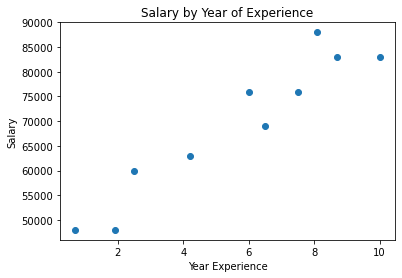

In [54]:
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.title("Salary by Year of Experience")
plt.scatter([year for salary,year in salaries_and_tenures],
        [salary for salary,year in salaries_and_tenures])

In [57]:
# Keys are years, values are lists of the salaries for each tenure
salary_by_tenure = {tenure:[] for salary,tenure in salaries_and_tenures}

In [58]:
salary_by_tenure

{8.7: [],
 8.1: [],
 0.7: [],
 6: [],
 6.5: [],
 7.5: [],
 2.5: [],
 10: [],
 1.9: [],
 4.2: []}

In [59]:
for salary,tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [60]:
salary_by_tenure

{8.7: [83000],
 8.1: [88000],
 0.7: [48000],
 6: [76000],
 6.5: [69000],
 7.5: [76000],
 2.5: [60000],
 10: [83000],
 1.9: [48000],
 4.2: [63000]}

In [61]:
# Keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure,salaries in salary_by_tenure.items()
}

In [63]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [64]:
# Bucket the tenures
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [69]:
bucket_groups = ["less than two", "between two and five",
                "more than five"]

# Keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = {bucket:[] for bucket in bucket_groups}

In [70]:
for salary,tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [71]:
salary_by_tenure_bucket

{'less than two': [48000, 48000],
 'between two and five': [60000, 63000],
 'more than five': [83000, 88000, 76000, 69000, 76000, 83000]}

In [72]:
# Keys are tenure buckets, value are average salary for that bucket
average_salary_by_bucket = {
    bucket: sum(salaries) / len(salaries)
    for bucket,salaries in salary_by_tenure_bucket.items()
}

In [73]:
average_salary_by_bucket

{'less than two': 48000.0,
 'between two and five': 61500.0,
 'more than five': 79166.66666666667}

---

## Paid Accounts

In [74]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    

In [76]:
interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
    ]

In [77]:
words_and_counts = Counter(word
                          for user,interest in interests
                          for word in interest.lower().split())

In [85]:
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [86]:
words_and_counts.most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

In [87]:
for word,count in words_and_counts.most_common():
    if count > 1:
        print(word,": ", count)

big :  3
data :  3
java :  3
python :  3
learning :  3
hadoop :  2
hbase :  2
cassandra :  2
scikit-learn :  2
r :  2
statistics :  2
regression :  2
probability :  2
machine :  2
neural :  2
networks :  2


# Well Done!